## Vika 10 - Tauganet í Keras (Tensorflow)

Sjá athugasemdir á Piazza um uppsetningu á Tensorflow.

### MNIST gagnasafn úr heimaverkefni 9

In [7]:
# Load data

import numpy as np
import tensorflow as tf

def readData(images_file, labels_file):
    x = np.loadtxt(images_file, delimiter=',')
    y = np.loadtxt(labels_file, delimiter=',')
    return x, y

np.random.seed(100)
trainData, trainLabels = readData("C:\\Users\\snati\\Documents\\Eðlisfræði\\3 ár\\Gervigreind-vor-2019\\Homework 9\\images_train.csv",
                                  'C:\\Users\\snati\\Documents\\Eðlisfræði\\3 ár\\Gervigreind-vor-2019\\Homework 9\\labels_train.csv')
p = np.random.permutation(60000)
trainData = trainData[p,:]

# One-hot encoding of class labels
trainLabels = tf.keras.utils.to_categorical(trainLabels, num_classes=10)
trainLabels = trainLabels[p,:]

# Take 10000 training samples aside for validation (a.k.a. "dev" set)
devData = trainData[0:10000,:]
devLabels = trainLabels[0:10000,:]
trainData = trainData[10000:,:]
trainLabels = trainLabels[10000:,:]

# Remove mean from data and scale it to speed up training
mean = np.mean(trainData)
std = np.std(trainData) # a scalar value
trainData = (trainData - mean) / std
devData = (devData - mean) / std

testData, testLabels = readData('C:\\Users\\snati\\Documents\\Eðlisfræði\\3 ár\\Gervigreind-vor-2019\\Homework 9\\images_test.csv',
                                'C:\\Users\\snati\\Documents\\Eðlisfræði\\3 ár\\Gervigreind-vor-2019\\Homework 9\\labels_test.csv')
testLabels = tf.keras.utils.to_categorical(testLabels, num_classes=10)
testData = (testData - mean) / std

# Convert data to 32-bit floating point representation
# This saves memory and speeds up training of deep networks
# and is *essential* for utilizing GPUs for training.
trainData = trainData.astype('float32')
testData = testData.astype('float32')

### Keras útfærsla á neti úr heimaverkefni 9.3

Keras er "high-level" forritaskil (API) fyrir TensorFlow ofl. tauganetapakka.

Eitt hulið lag með 300 nóðum, sigmoid virkjunarfalli og "categorical cross entropy" markfalli (hliðstæða logistic regression tapfalls fyrir marga flokka).

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

num_classes=10
num_epochs=30
batch_size=1000

model = Sequential([
    Dense(300, 
    input_dim=trainData.shape[1]),
    Activation('sigmoid'),
    Dense(num_classes),
    Activation('softmax'),
])
model.summary()

model.compile(optimizer='sgd', # Note: Default parameters differ from those on homework #9
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(trainData, trainLabels, 
                  epochs=num_epochs, batch_size=batch_size,
                  verbose=1, validation_data=(devData, devLabels))

score = model.evaluate(testData, testLabels, verbose=0)
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 61us/step - loss: 2.0992 - acc: 0.3317 - val_loss: 1.8476 - val_acc: 0.5470
Epoch 2/30
50000/50000 [==============================] - 0s 9us/step - loss: 1.6

## Tapfall og flokkunarskekkja í þjálfun

Skoðum hvernig tapfall (e. loss function) breytist á meðan þjálfun stendur.

"[Loss functions] are a window to your model's heart" - A. Karpathy
https://lossfunctions.tumblr.com/

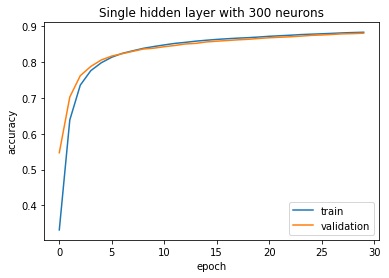

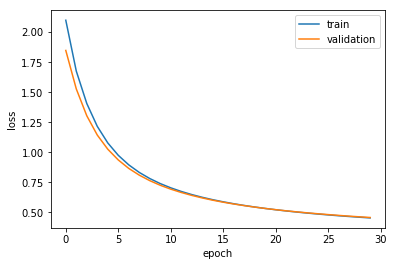

In [14]:
# Training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Single hidden layer with 300 neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Tauganet með 2 huldum lögum

512 nóður í hverju lagi og ReLU virkjunarföll.

In [15]:
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.optimizers import RMSprop

batch_size = 128
num_epochs = 10 # Increase to 30 to get 98% test accuracy

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=trainData.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(trainData, trainLabels,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(devData, devLabels))
score = model.evaluate(testData, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 46us/step - loss: 0.2787 

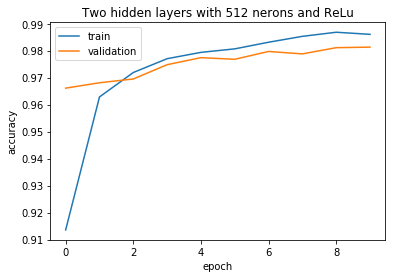

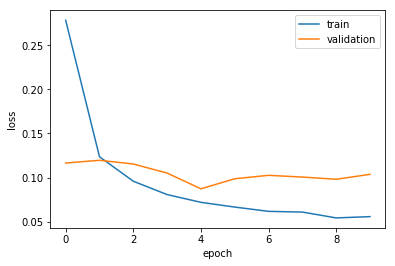

In [16]:
# Training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Two hidden layers with 512 nerons and ReLu')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()